# ARIMA

**Assumptions:**
- Stationary time series
    - If it's not do differences until it is

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
targets = pd.read_csv("../../../data/targets.csv", parse_dates=['date'])
features = pd.read_csv("../../../data/features.csv", parse_dates=['date'])

## Prepare the Data

In [39]:
thresh = int(0.9 * len(features))
features = features.dropna(axis=1, thresh=thresh).bfill().ffill()

In [40]:
targets = targets[['date', 'total_consumption']]

In [103]:
features

,date,demand,net_generation,total_interchange,net_generation_coal,net_generation_natural_gas,net_generation_nuclear,net_generation_hydropower_and_pumped_storage,net_generation_solar,net_generation_wind,...,SN53,SNOW,SNWD,SX52,SX53,TMAX,TMIN,TOBS,WSFG,WT01
0,2016-01-01,69621.0,67425.0,-3254.0,39962.0,20101.0,11610.0,746.0,0.0,3865.0,...,17.0,5.0,96.0,17.0,17.0,-27.0,-77.0,-56.0,192.0,1.0
1,2016-01-02,69855.0,67906.0,-2904.0,39962.0,20101.0,11610.0,746.0,0.0,3865.0,...,17.0,1.0,92.0,12.0,17.0,-17.0,-78.0,-53.0,192.0,1.0
2,2016-01-03,69944.0,67305.0,-3588.0,39962.0,20101.0,11610.0,746.0,0.0,3865.0,...,17.0,3.0,85.0,12.0,17.0,3.0,-69.0,-35.0,192.0,1.0
3,2016-01-04,78335.0,77001.0,-2642.0,39962.0,20101.0,11610.0,746.0,0.0,3865.0,...,17.0,17.0,92.0,12.0,17.0,-21.0,-84.0,-75.0,192.0,1.0
4,2016-01-05,80600.0,81083.0,-896.0,39962.0,20101.0,11610.0,746.0,0.0,3865.0,...,17.0,1.0,90.0,8.0,17.0,-30.0,-126.0,-86.0,192.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,2024-09-14,75856.0,72728.0,-4453.0,21114.0,31613.0,11557.0,1049.0,1925.0,5164.0,...,217.0,0.0,0.0,217.0,217.0,282.0,136.0,169.0,156.0,1.0
3180,2024-09-15,76340.0,72659.0,-5173.0,21023.0,29004.0,11520.0,1053.0,1917.0,7857.0,...,217.0,0.0,0.0,217.0,217.0,284.0,144.0,176.0,156.0,1.0
3181,2024-09-16,81129.0,78197.0,-4749.0,22613.0,31772.0,11471.0,1118.0,2015.0,8937.0,...,217.0,0.0,0.0,217.0,217.0,295.0,141.0,163.0,156.0,1.0
3182,2024-09-17,80632.0,79791.0,-2634.0,22567.0,30658.0,11452.0,995.0,2400.0,11449.0,...,217.0,0.0,0.0,217.0,217.0,294.0,130.0,155.0,156.0,1.0


## Splits

In [100]:
y = targets['total_consumption']
adfuller(y, maxlag=0)

(-4.10214774006963,
 0.0009606376899413373,
 0,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 2960.453152024645)

In [80]:
y_train = y[:80]
y_test = y[80:]

In [101]:
order = (0, 2, 1)
model = SARIMAX(endog=y_train, exog=None, order=order).fit()
# model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45472D+01    |proj g|=  1.33066D-01

At iterate    5    f=  1.44629D+01    |proj g|=  2.03475D-03

At iterate   10    f=  1.44620D+01    |proj g|=  9.19247D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     11      1     0     0   9.192D-06   1.446D+01
  F =   14.461964765358838     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


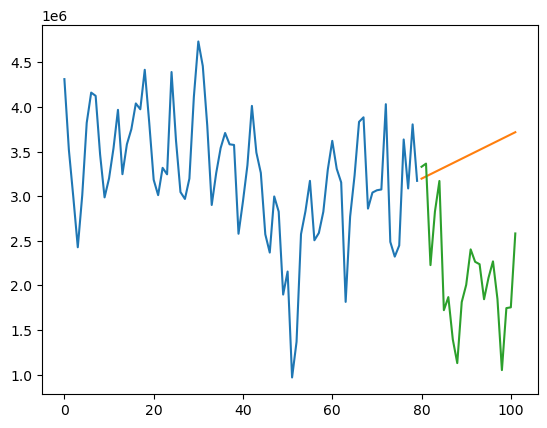

In [102]:
plt.plot(y_train)
plt.plot(model.forecast(len(y_test)))
plt.plot(y_test)

In [88]:
model.forecast(len(X_test))

80     3.154361e+06
81     3.145160e+06
82     3.140213e+06
83     3.137554e+06
84     3.136124e+06
           ...     
759    3.134462e+06
760    3.134462e+06
761    3.134462e+06
762    3.134462e+06
763    3.134462e+06
Name: predicted_mean, Length: 684, dtype: float64

## Training a Baseline

## Hyper-Parameter Tuning

## Evaluation